In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [2]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [4]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI_CombinedProgression.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL,Y_GRI,Y_MD,Y_VFI,Y_combined
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-2.15,-3.26,98,96,0,0,0,0
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-7.73,-11.45,82,73,1,0,0,1
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-1.28,-1.13,98,97,0,0,0,0
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-0.72,0.60,98,99,0,0,0,0
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,0.024641,6.266940,-1.69,-0.51,99,99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,0.000000,9.601643,0.53,-2.51,98,93,1,0,0,1
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,0.000000,5.941136,-8.97,-14.71,78,56,1,1,1,1
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,0.000000,5.941136,-11.39,-11.37,70,67,1,0,0,1
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,0.172485,6.193018,-3.48,-19.28,97,51,1,1,1,1


In [5]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 815)

In [6]:
df_raw = df

## 1. GRI only

In [7]:
df = df_raw.iloc[:, np.r_[1, 28:797, 811]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI,Y_GRI
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171,0
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438,1
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429,0
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343,0
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467,1
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699,1
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481,1
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627,1


In [8]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 771)

In [9]:
y = df.iloc[:, 770]
y

0      0
1      1
2      0
3      0
4      0
      ..
579    1
580    1
581    1
582    1
583    1
Name: Y_GRI, Length: 575, dtype: int64

In [10]:
# https://github.com/applied-systems-biology/Dynamic_SPHARM/blob/master/SPHARM/classes/stratified_group_shuffle_split.py

from __future__ import print_function
from __future__ import division

from sklearn.utils.validation import check_array
from sklearn.model_selection import StratifiedShuffleSplit


class GroupShuffleSplitStratified(StratifiedShuffleSplit):

    def __init__(self, n_splits=5, test_size=2, train_size=None, random_state=None):

        super(GroupShuffleSplitStratified, self).__init__(
            n_splits=n_splits,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state)

    def _iter_indices(self, X, y, groups):
        if groups is None:
            raise ValueError("The 'groups' parameter should not be None.")
        groups = check_array(groups, ensure_2d=False, dtype=None)
        groups_unique, group_indices = np.unique(groups, return_inverse=True)
        classes = []
        for gr in groups_unique:
            classes.append(y[np.where(groups==gr)[0][0]])

        for group_train, group_test in super(
                GroupShuffleSplitStratified, self)._iter_indices(X=groups_unique, y=classes):
            # these are the indices of classes in the partition
            # invert them into data indices

            train = np.flatnonzero(np.in1d(group_indices, group_train))
            test = np.flatnonzero(np.in1d(group_indices, group_test))

            yield train, test

    def split(self, X, y=None, groups=None):
        return super(GroupShuffleSplitStratified, self).split(X, y, groups)

In [11]:
train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

(523, 771)
(52, 771)


In [12]:
train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

(468, 771)
(55, 771)


In [13]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(52, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
26,34.0,34.0,35.0,35.0,36.0,36.0,37.0,38.0,39.0,39.0,...,34.0,33.0,33.0,33.0,32.0,32.0,32.0,33.0,33.0,33.0
27,42.0,43.0,44.0,45.0,46.0,46.0,47.0,47.0,48.0,48.0,...,41.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,41.0,41.0
51,34.0,35.0,37.0,40.0,42.0,44.0,46.0,47.0,48.0,48.0,...,29.0,29.0,28.0,28.0,28.0,29.0,29.0,30.0,31.0,32.0
52,52.0,52.0,52.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,...,52.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0
62,53.0,53.0,53.0,54.0,54.0,55.0,56.0,56.0,57.0,58.0,...,55.0,55.0,55.0,55.0,54.0,54.0,54.0,53.0,53.0,53.0


In [14]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(52, 768, 1)


In [15]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(468, 768, 1)


In [16]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(55, 768, 1)


In [17]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y #The second column is 'progressor', The first column is 'non-progressor'

0  1
1  0    407
0  1    168
dtype: int64


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [18]:
y = y.rename(columns={0: "Non-Progressor", 1: "Progressor"})
y

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [19]:
y_test = y.iloc[test_i]
y_test

,Non-Progressor,Progressor
26,1,0
27,1,0
51,0,1
52,1,0
62,0,1
63,1,0
118,1,0
143,0,1
144,1,0
145,1,0


In [20]:
y_train = y.iloc[train_i].iloc[train_id]
y_train

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [21]:
y_val = y.iloc[train_i].iloc[val_id]
y_val

,Non-Progressor,Progressor
12,0,1
16,0,1
17,1,0
28,1,0
29,1,0
49,0,1
50,1,0
60,0,1
88,0,1
89,1,0


In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(468, 768, 1)
(52, 768, 1)
(55, 768, 1)
Non-Progressor  Progressor
1               0             331
0               1             137
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             17
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             14
dtype: int64


### 1.1 CNN model without resampling.

In [23]:
#create model1
model_1 = Sequential()

#add layers
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_1.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_1.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 766, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 255, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 64)           0         
                                                                 
 flatten (Flatten)           (None, 16320)             0         
                                                                 
 dense (Dense)               (None, 64)                1044544   
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

2022-07-13 16:05:43.635280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [25]:
model_1.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_1.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 27ms/step - loss: 0.6245 - accuracy: 0.6880 - val_loss: 0.6116 - val_accuracy: 0.6909
Epoch 2/500
15/15 [==============================] - 0s 18ms/step - loss: 0.5990 - accuracy: 0.7073 - val_loss: 0.6082 - val_accuracy: 0.6909
Epoch 3/500
15/15 [==============================] - 0s 17ms/step - loss: 0.5976 - accuracy: 0.7073 - val_loss: 0.6051 - val_accuracy: 0.6909
Epoch 4/500
15/15 [==============================] - 0s 19ms/step - loss: 0.5952 - accuracy: 0.7073 - val_loss: 0.6035 - val_accuracy: 0.6909
Epoch 5/500
15/15 [==============================] - 0s 18ms/step - loss: 0.5942 - accuracy: 0.7073 - val_loss: 0.6027 - val_accuracy: 0.6909
Epoch 6/500
15/15 [==============================] - 0s 18ms/step - loss: 0.5930 - accuracy: 0.7073 - val_loss: 0.6030 - val_accuracy: 0.6909
Epoch 7/500
15/15 [==============================] - 0s 18ms/step - loss: 0.5934 - accuracy: 0.7073 - val_loss: 0.6000 - val_accuracy: 0.6909
Epoch 

15/15 [==============================] - 0s 20ms/step - loss: 0.5065 - accuracy: 0.7607 - val_loss: 0.5806 - val_accuracy: 0.6909
Epoch 59/500
15/15 [==============================] - 0s 20ms/step - loss: 0.5053 - accuracy: 0.7564 - val_loss: 0.5738 - val_accuracy: 0.6909
Epoch 60/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5039 - accuracy: 0.7585 - val_loss: 0.5775 - val_accuracy: 0.6909
Epoch 61/500
15/15 [==============================] - 0s 20ms/step - loss: 0.5033 - accuracy: 0.7500 - val_loss: 0.5722 - val_accuracy: 0.7273
Epoch 62/500
15/15 [==============================] - 0s 21ms/step - loss: 0.5057 - accuracy: 0.7564 - val_loss: 0.5746 - val_accuracy: 0.7091
Epoch 63/500
15/15 [==============================] - 0s 19ms/step - loss: 0.5013 - accuracy: 0.7564 - val_loss: 0.5749 - val_accuracy: 0.7091
Epoch 64/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4976 - accuracy: 0.7671 - val_loss: 0.5763 - val_accuracy: 0.6909
Epoch 65/500

15/15 [==============================] - 0s 21ms/step - loss: 0.4086 - accuracy: 0.8205 - val_loss: 0.6046 - val_accuracy: 0.7091
Epoch 116/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4015 - accuracy: 0.8376 - val_loss: 0.6114 - val_accuracy: 0.7091
Epoch 117/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4061 - accuracy: 0.8355 - val_loss: 0.6092 - val_accuracy: 0.7091
Epoch 118/500
15/15 [==============================] - 0s 21ms/step - loss: 0.3963 - accuracy: 0.8291 - val_loss: 0.6110 - val_accuracy: 0.7091
Epoch 119/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4040 - accuracy: 0.8205 - val_loss: 0.6181 - val_accuracy: 0.7091
Epoch 120/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4054 - accuracy: 0.8248 - val_loss: 0.6113 - val_accuracy: 0.7091
Epoch 121/500
15/15 [==============================] - 0s 22ms/step - loss: 0.4105 - accuracy: 0.8269 - val_loss: 0.6088 - val_accuracy: 0.7273
Epoch 

In [26]:
m1_eval_test = model_1.evaluate(X_test, y_test)
m1_eval_val = model_1.evaluate(X_val, y_val)

2/2 [==============================] - 0s 8ms/step - loss: 0.5722 - accuracy: 0.7273


**Summary statistics and confusion matrix for test set:**

In [27]:
pred = model_1.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.618421052631579
average precision score:  0.5975977123679015


In [28]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 6ms/step - loss: 0.5836 - accuracy: 0.6923


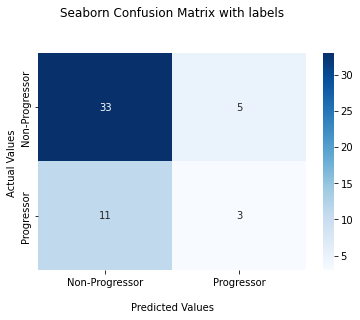

In [29]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_test, y_test)
plt.show()

**Summary statistics and confusion matrix for validation set:**

In [30]:
pred = model_1.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 4ms/step
roc auc score:  0.6811145510835913
average precision score:  0.6596416235922022


In [31]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.5722 - accuracy: 0.7273


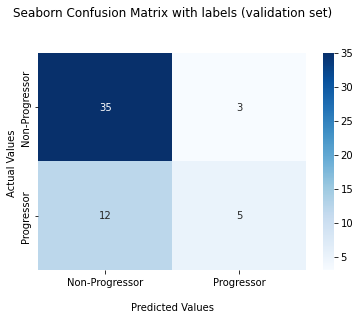

In [32]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_val, y_val)
plt.show()

### 1.2 CNN model with resampling

In [33]:
y_progressor = np.array(y_train)[:,1]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [34]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train_2d.shape

(468, 768)

In [35]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(662, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [36]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
657,0,1
658,0,1
659,0,1
660,0,1


In [37]:
y_train_over=y_train_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             331
1               0             331
dtype: int64 



In [38]:
print(y_train.value_counts(), '\n')

Non-Progressor  Progressor
1               0             331
0               1             137
dtype: int64 



In [39]:
X_train_over = np.reshape(X_train_over, (X_train_over.shape[0], X_train_over.shape[1], 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.14435696],
        [0.14698163],
        [0.14698163],
        ...,
        [0.14698163],
        [0.14698163],
        [0.14435696]],

       [[0.16272966],
        [0.16535433],
        [0.167979  ],
        ...,
        [0.15485564],
        [0.15748031],
        [0.16010499]],

       [[0.16010499],
        [0.15748031],
        [0.15485564],
        ...,
        [0.16535433],
        [0.16272966],
        [0.16272966]]])

In [40]:
#create model2
model_2 = Sequential()

#add layers
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 16320)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1044544   
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                      

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [42]:
model_2.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6938 - accuracy: 0.4804 - val_loss: 0.6723 - val_accuracy: 0.6909
Epoch 2/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6922 - accuracy: 0.5257 - val_loss: 0.6751 - val_accuracy: 0.6909
Epoch 3/500
21/21 [==============================] - 0s 21ms/step - loss: 0.6892 - accuracy: 0.5060 - val_loss: 0.6705 - val_accuracy: 0.7091
Epoch 4/500
21/21 [==============================] - 0s 22ms/step - loss: 0.6876 - accuracy: 0.5211 - val_loss: 0.6630 - val_accuracy: 0.7273
Epoch 5/500
21/21 [==============================] - 0s 24ms/step - loss: 0.6807 - accuracy: 0.6178 - val_loss: 0.7131 - val_accuracy: 0.3636
Epoch 6/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6848 - accuracy: 0.5498 - val_loss: 0.7113 - val_accuracy: 0.4182
Epoch 7/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6766 - accuracy: 0.5906 - val_loss: 0.6755 - val_accuracy: 0.6000
Epoch 

21/21 [==============================] - 0s 23ms/step - loss: 0.5071 - accuracy: 0.7704 - val_loss: 0.6440 - val_accuracy: 0.6909
Epoch 59/500
21/21 [==============================] - 0s 20ms/step - loss: 0.4946 - accuracy: 0.7795 - val_loss: 0.6157 - val_accuracy: 0.6909
Epoch 60/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4966 - accuracy: 0.7734 - val_loss: 0.6396 - val_accuracy: 0.6909
Epoch 61/500
21/21 [==============================] - 0s 23ms/step - loss: 0.4865 - accuracy: 0.7900 - val_loss: 0.6634 - val_accuracy: 0.6364
Epoch 62/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4894 - accuracy: 0.7779 - val_loss: 0.6226 - val_accuracy: 0.6909
Epoch 63/500
21/21 [==============================] - 1s 25ms/step - loss: 0.4888 - accuracy: 0.7764 - val_loss: 0.6895 - val_accuracy: 0.6364
Epoch 64/500
21/21 [==============================] - 0s 24ms/step - loss: 0.4798 - accuracy: 0.8021 - val_loss: 0.6285 - val_accuracy: 0.6909
Epoch 65/500

In [43]:
m2_eval_test = model_2.evaluate(X_test, y_test)
m2_eval_val = model_2.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.6630 - accuracy: 0.7273


**Summary statistics and confusion matrix for test set:**

In [44]:
pred = model_2.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.6447368421052632
average precision score:  0.609380695316379


In [45]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.7500


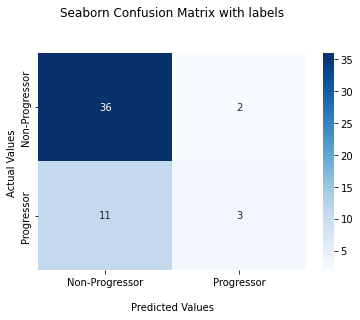

In [46]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2.evaluate(X_test, y_test)
plt.show()

**Summary statistics and confusion matrix for validation set:**

In [47]:
pred = model_2.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.6842105263157894
average precision score:  0.701835874577447


In [48]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.7273


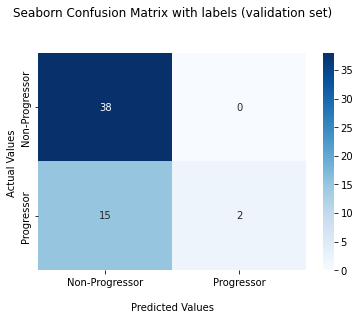

In [49]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_2.evaluate(X_val, y_val)
plt.show()

## 2. GRI and MD

In [50]:
df = df_raw.iloc[:, np.r_[1, 28:797, 811, 812]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI,Y_GRI,Y_MD
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171,0,0
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438,1,0
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429,0,0
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343,0,0
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467,1,0
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699,1,1
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481,1,0
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627,1,1


In [51]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 772)

In [52]:
y = df.iloc[:, 770] + df.iloc[:, 771]
y = np.array(y)
y = y//2 + y%2
y = pd.DataFrame(y)
y = y.rename(columns = {0:'Y_GRIMD'})
y = y.iloc[:, 0]
y

0      0
1      1
2      0
3      0
4      0
      ..
570    1
571    1
572    1
573    1
574    1
Name: Y_GRIMD, Length: 575, dtype: int64

Using the same training, validation, and testing set.

train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=10).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

In [53]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(52, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
26,34.0,34.0,35.0,35.0,36.0,36.0,37.0,38.0,39.0,39.0,...,34.0,33.0,33.0,33.0,32.0,32.0,32.0,33.0,33.0,33.0
27,42.0,43.0,44.0,45.0,46.0,46.0,47.0,47.0,48.0,48.0,...,41.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,41.0,41.0
51,34.0,35.0,37.0,40.0,42.0,44.0,46.0,47.0,48.0,48.0,...,29.0,29.0,28.0,28.0,28.0,29.0,29.0,30.0,31.0,32.0
52,52.0,52.0,52.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,...,52.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0
62,53.0,53.0,53.0,54.0,54.0,55.0,56.0,56.0,57.0,58.0,...,55.0,55.0,55.0,55.0,54.0,54.0,54.0,53.0,53.0,53.0


In [54]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(52, 768, 1)


In [55]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(468, 768, 1)


In [56]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(55, 768, 1)


In [57]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y #The second column is 'progressor', The first column is 'non-progressor'

0  1
1  0    400
0  1    175
dtype: int64


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
570,0,1
571,0,1
572,0,1
573,0,1


In [58]:
y = y.rename(columns={0: "Non-Progressor", 1: "Progressor"})
y

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
570,0,1
571,0,1
572,0,1
573,0,1


In [59]:
y_test = y.iloc[test_i]
y_test

,Non-Progressor,Progressor
26,1,0
27,1,0
51,0,1
52,1,0
60,0,1
61,0,1
116,1,0
141,0,1
142,1,0
143,1,0


In [60]:
y_train = y.iloc[train_i].iloc[train_id]
y_train

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
570,0,1
571,0,1
572,0,1
573,0,1


In [61]:
y_val = y.iloc[train_i].iloc[val_id]
y_val

,Non-Progressor,Progressor
12,0,1
16,0,1
17,1,0
28,1,0
29,1,0
49,0,1
50,1,0
59,0,1
86,0,1
87,1,0


In [62]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(468, 768, 1)
(52, 768, 1)
(55, 768, 1)
Non-Progressor  Progressor
1               0             325
0               1             143
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             17
dtype: int64 

Non-Progressor  Progressor
1               0             37
0               1             15
dtype: int64


### 2.1 CNN model without resampling

In [63]:
#create model1
model_1 = Sequential()

#add layers
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_1.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_1.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 16320)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1044544   
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                      

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [65]:
model_1.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_1.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 32ms/step - loss: 0.6616 - accuracy: 0.6581 - val_loss: 0.6239 - val_accuracy: 0.6909
Epoch 2/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6078 - accuracy: 0.6944 - val_loss: 0.6072 - val_accuracy: 0.6909
Epoch 3/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6066 - accuracy: 0.6944 - val_loss: 0.6083 - val_accuracy: 0.6909
Epoch 4/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6067 - accuracy: 0.6944 - val_loss: 0.6058 - val_accuracy: 0.6909
Epoch 5/500
15/15 [==============================] - 0s 26ms/step - loss: 0.6040 - accuracy: 0.6944 - val_loss: 0.6052 - val_accuracy: 0.6909
Epoch 6/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6040 - accuracy: 0.6944 - val_loss: 0.6043 - val_accuracy: 0.6909
Epoch 7/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6089 - accuracy: 0.6944 - val_loss: 0.6042 - val_accuracy: 0.6909
Epoch 

15/15 [==============================] - 0s 33ms/step - loss: 0.5257 - accuracy: 0.7372 - val_loss: 0.5728 - val_accuracy: 0.6909
Epoch 59/500
15/15 [==============================] - 0s 32ms/step - loss: 0.5168 - accuracy: 0.7607 - val_loss: 0.5745 - val_accuracy: 0.7091
Epoch 60/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5244 - accuracy: 0.7393 - val_loss: 0.5742 - val_accuracy: 0.7091
Epoch 61/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5248 - accuracy: 0.7692 - val_loss: 0.5724 - val_accuracy: 0.7091
Epoch 62/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5186 - accuracy: 0.7543 - val_loss: 0.5762 - val_accuracy: 0.7091
Epoch 63/500
15/15 [==============================] - 0s 31ms/step - loss: 0.5154 - accuracy: 0.7436 - val_loss: 0.5733 - val_accuracy: 0.6727
Epoch 64/500
15/15 [==============================] - 0s 31ms/step - loss: 0.5144 - accuracy: 0.7436 - val_loss: 0.5725 - val_accuracy: 0.7091
Epoch 65/500

15/15 [==============================] - 0s 23ms/step - loss: 0.4298 - accuracy: 0.8077 - val_loss: 0.6069 - val_accuracy: 0.7091
Epoch 116/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4249 - accuracy: 0.8184 - val_loss: 0.6027 - val_accuracy: 0.7273
Epoch 117/500
15/15 [==============================] - 0s 25ms/step - loss: 0.4233 - accuracy: 0.8120 - val_loss: 0.6120 - val_accuracy: 0.7091
Epoch 118/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4243 - accuracy: 0.8184 - val_loss: 0.6069 - val_accuracy: 0.7091
Epoch 119/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4268 - accuracy: 0.8248 - val_loss: 0.6113 - val_accuracy: 0.7273
Epoch 120/500
15/15 [==============================] - 0s 23ms/step - loss: 0.4139 - accuracy: 0.8205 - val_loss: 0.6098 - val_accuracy: 0.7273
Epoch 121/500
15/15 [==============================] - 0s 23ms/step - loss: 0.4159 - accuracy: 0.8312 - val_loss: 0.6103 - val_accuracy: 0.7273
Epoch 

In [66]:
m1_eval_test = model_1.evaluate(X_test, y_test)
m1_eval_val = model_1.evaluate(X_val, y_val)

2/2 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.7273


**Summary statistics and confusion matrix for test set:**

In [67]:
pred = model_1.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 7ms/step
roc auc score:  0.6486486486486487
average precision score:  0.6204275556828782


In [68]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.7115


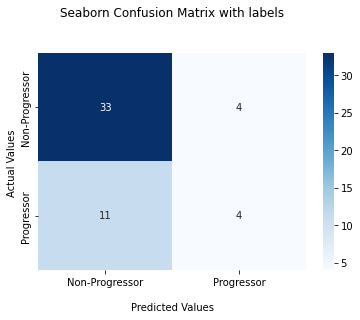

In [69]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_test, y_test)
plt.show()

**Summary statistics and confusion matrix for validation set:**

In [70]:
pred = model_1.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.676470588235294
average precision score:  0.65812383903241


In [71]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.7273


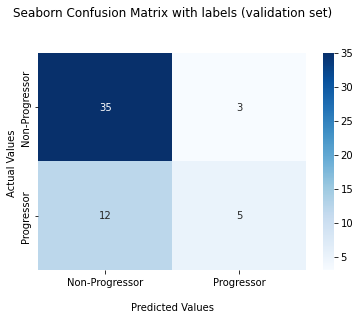

In [72]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_val, y_val)
plt.show()

### 2.2 CNN model with resampling

In [73]:
y_progressor = np.array(y_train)[:,1]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [74]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train_2d.shape

(468, 768)

In [75]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(650, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [76]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
645,0,1
646,0,1
647,0,1
648,0,1


In [77]:
y_train_over=y_train_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             325
1               0             325
dtype: int64 



In [78]:
print(y_train.value_counts(), '\n')

Non-Progressor  Progressor
1               0             325
0               1             143
dtype: int64 



In [79]:
X_train_over = np.reshape(X_train_over, (X_train_over.shape[0], X_train_over.shape[1], 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.23884514],
        [0.24146982],
        [0.24146982],
        ...,
        [0.23884514],
        [0.23884514],
        [0.23884514]],

       [[0.07874016],
        [0.07349081],
        [0.07086614],
        ...,
        [0.09186352],
        [0.08661417],
        [0.08136483]],

       [[0.11811024],
        [0.12073491],
        [0.12335958],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11811024]]])

In [80]:
#create model2
model_2 = Sequential()

#add layers
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_3 (Flatten)         (None, 16320)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1044544   
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                      

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=200,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [82]:
model_2.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 30ms/step - loss: 0.6938 - accuracy: 0.5046 - val_loss: 0.6562 - val_accuracy: 0.6909
Epoch 2/500
21/21 [==============================] - 0s 22ms/step - loss: 0.6892 - accuracy: 0.5262 - val_loss: 0.6697 - val_accuracy: 0.7091
Epoch 3/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6847 - accuracy: 0.5477 - val_loss: 0.6817 - val_accuracy: 0.5818
Epoch 4/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6779 - accuracy: 0.5985 - val_loss: 0.6630 - val_accuracy: 0.6727
Epoch 5/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6766 - accuracy: 0.6031 - val_loss: 0.6377 - val_accuracy: 0.6909
Epoch 6/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6709 - accuracy: 0.5892 - val_loss: 0.6773 - val_accuracy: 0.5818
Epoch 7/500
21/21 [==============================] - 0s 24ms/step - loss: 0.6657 - accuracy: 0.6185 - val_loss: 0.6474 - val_accuracy: 0.6545
Epoch 

21/21 [==============================] - 1s 25ms/step - loss: 0.4770 - accuracy: 0.8031 - val_loss: 0.6318 - val_accuracy: 0.6727
Epoch 59/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4746 - accuracy: 0.8015 - val_loss: 0.6207 - val_accuracy: 0.6727
Epoch 60/500
21/21 [==============================] - 1s 24ms/step - loss: 0.4762 - accuracy: 0.8015 - val_loss: 0.6198 - val_accuracy: 0.6727
Epoch 61/500
21/21 [==============================] - 1s 24ms/step - loss: 0.4709 - accuracy: 0.8138 - val_loss: 0.6413 - val_accuracy: 0.6727
Epoch 62/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4592 - accuracy: 0.8000 - val_loss: 0.6683 - val_accuracy: 0.6364
Epoch 63/500
21/21 [==============================] - 0s 21ms/step - loss: 0.4698 - accuracy: 0.7908 - val_loss: 0.6952 - val_accuracy: 0.6545
Epoch 64/500
21/21 [==============================] - 0s 21ms/step - loss: 0.4632 - accuracy: 0.7969 - val_loss: 0.6334 - val_accuracy: 0.6727
Epoch 65/500

21/21 [==============================] - 0s 19ms/step - loss: 0.3261 - accuracy: 0.8708 - val_loss: 0.7397 - val_accuracy: 0.6909
Epoch 116/500
21/21 [==============================] - 0s 23ms/step - loss: 0.3236 - accuracy: 0.8785 - val_loss: 0.7534 - val_accuracy: 0.6364
Epoch 117/500
21/21 [==============================] - 0s 20ms/step - loss: 0.3155 - accuracy: 0.8800 - val_loss: 0.7275 - val_accuracy: 0.7273
Epoch 118/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3192 - accuracy: 0.8646 - val_loss: 0.7265 - val_accuracy: 0.7091
Epoch 119/500
21/21 [==============================] - 0s 20ms/step - loss: 0.3183 - accuracy: 0.8785 - val_loss: 0.7645 - val_accuracy: 0.6545
Epoch 120/500
21/21 [==============================] - 0s 23ms/step - loss: 0.3188 - accuracy: 0.8815 - val_loss: 0.7397 - val_accuracy: 0.7091
Epoch 121/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3130 - accuracy: 0.8846 - val_loss: 0.7456 - val_accuracy: 0.7091
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 25ms/step - loss: 0.1781 - accuracy: 0.9385 - val_loss: 0.8455 - val_accuracy: 0.6909
Epoch 173/500
21/21 [==============================] - 1s 30ms/step - loss: 0.1728 - accuracy: 0.9415 - val_loss: 0.8468 - val_accuracy: 0.7091
Epoch 174/500
21/21 [==============================] - 1s 25ms/step - loss: 0.1656 - accuracy: 0.9508 - val_loss: 0.8734 - val_accuracy: 0.6909
Epoch 175/500
21/21 [==============================] - 1s 27ms/step - loss: 0.1708 - accuracy: 0.9600 - val_loss: 0.8615 - val_accuracy: 0.6909
Epoch 176/500
21/21 [==============================] - 1s 27ms/step - loss: 0.1662 - accuracy: 0.9600 - val_loss: 0.8563 - val_accuracy: 0.6909
Epoch 177/500
21/21 [==============================] - 1s 28ms/step - loss: 0.1658 - accuracy: 0.9554 - val_loss: 0.8968 - val_accuracy: 0.6727
Epoch 178/500
21/21 [==============================] - 1s 30ms/step - loss: 0.1624 - accuracy: 0.9462 - val_loss: 0.8640 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0810 - accuracy: 0.9877 - val_loss: 1.0318 - val_accuracy: 0.6909
Epoch 230/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0801 - accuracy: 0.9877 - val_loss: 1.0666 - val_accuracy: 0.6727
Epoch 231/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0933 - accuracy: 0.9769 - val_loss: 1.0267 - val_accuracy: 0.6909
Epoch 232/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0737 - accuracy: 0.9892 - val_loss: 1.0392 - val_accuracy: 0.6909
Epoch 233/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0890 - accuracy: 0.9785 - val_loss: 1.0281 - val_accuracy: 0.7091
Epoch 234/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0762 - accuracy: 0.9846 - val_loss: 1.0553 - val_accuracy: 0.6727
Epoch 235/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0780 - accuracy: 0.9846 - val_loss: 1.0267 - val_accuracy:

In [83]:
m2_eval_test = model_2.evaluate(X_test, y_test)
m2_eval_val = model_2.evaluate(X_val, y_val)

2/2 [==============================] - 0s 5ms/step - loss: 0.5892 - accuracy: 0.7636


**Summary statistics and confusion matrix for test set:**

In [84]:
pred = model_2.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 3ms/step
roc auc score:  0.6468468468468469
average precision score:  0.6112475181100518


In [85]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6923


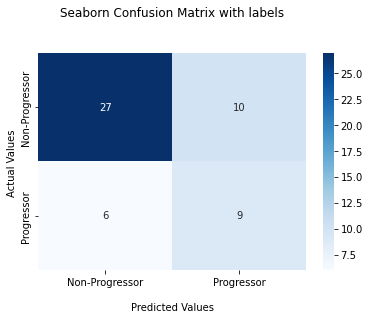

In [86]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2.evaluate(X_test, y_test)
plt.show()

**Summary statistics and confusion matrix for validation set:**

In [87]:
pred = model_2.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 10ms/step
roc auc score:  0.6965944272445821
average precision score:  0.6692762107821091


In [88]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.5892 - accuracy: 0.7636


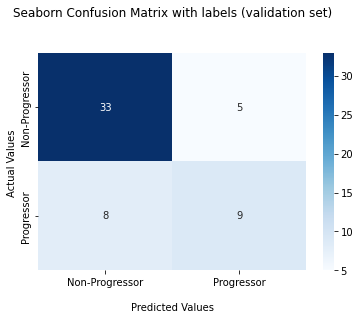

In [89]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_2.evaluate(X_val, y_val)
plt.show()

Saving

In [94]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import os
# serialize model to JSON
model_1_json = model_1.to_json()
with open("model_1.json", "w") as json_file:
    json_file.write(model_1_json)
# serialize weights to HDF5
model_1.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


In [95]:
# serialize model to JSON
model_2_json = model_2.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_2_json)
# serialize weights to HDF5
model_2.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


Loading

In [ ]:
# load json and create model
json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))